In [1]:
import numpy as np
from math import pi,sqrt
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True

/tmp/yes/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
# 0: id
# 1: 8
# 2: 8
# 3: 10
# 4: \bar 10

d={'1':1, '8':3, '10':1, '10b':1}

R88_8=np.array([[-1j,0],[0,1j]])
R88={'1':np.array([[-1]]), '8':R88_8, '10':np.array([[-1]]), '10b':np.array([[-1]])}
F888={}
F888['1']=np.array([[1,0],[0,1]])
F888['8']=np.array([[-1/2,0,0,1/2],\
           [0,1/2,1/2,0],\
           [0,1/2,1/2,0],\
           [1/2,0,0,-1/2]])
F888['10']=np.array([[-1/2,-sqrt(3)/2],[sqrt(3)/2,-1/2]])
F888['10b']=np.array([[-1/2,sqrt(3)/2],[-sqrt(3)/2,-1/2]])

# np.random.seed(1)
Nrep = 101
p = np.zeros((2,2))
plist = np.linspace(0,1,Nrep)

LN1 = np.zeros(Nrep)
LN_an = np.zeros(Nrep)

for i_r in range(0,Nrep):
#     p[0,0]=np.random.randn(1)
#     p[1,1]=1-p[0,0]
    p[0,0] = plist[i_r]
    p[1,1] = 1 - plist[i_r]
    
    M={}
    neg=0
    for c in ['1','8','10','10b']:
        if c=='8':
            M[c]=np.array([[0,0],[0,0]],dtype=np.complex64)
            nu_m=2
        else:
            M[c]= np.array([[0]],dtype=np.complex64)
            nu_m=1
        for nu in range(0,nu_m):
            for nup in range(0,nu_m):
                for s in range(0,2):
                    for sp in range(0,nu_m):
                        for mu in range(0,2):
                            for mup in range(0,2):
                                M[c][nu,nup]+= p[mu,mup]* R88_8[mu,s] * F888[c][s+2*nu,mup+2*sp]*R88[c][sp,nup]
                    
        if c=='8':
            Mh=np.dot(np.matrix(M[c]).H,M[c])
            neg += d[c]/d['8']*np.sum(np.sqrt(np.linalg.eigvalsh(Mh)))
        else:
            neg += d[c]/d['8']*np.abs(M[c])
    LN1[i_r]= np.log(neg)
#     M8 = [[1j*(p[0,0]+p[1,1])/2,1j*(-p[0,1]+p[1,0])/2],[1j*(-p[0,1]+p[1,0])/2,-1j*(p[0,0]+p[1,1])/2]]
#     M1=(p[0,0]-p[1,1])
#     M10=(p[0,0]-p[1,1])/2 + (p[0,1]+p[1,0])*sqrt(3)/2
#     M10b=(p[0,0]-p[1,1])/2 - (p[0,1]+p[1,0])*sqrt(3)/2
#     LN_an[i_r]= np.log( np.sum(np.sqrt(np.linalg.eigvalsh(np.dot(np.matrix(M8).H,M8)) ) ) \
#                 + (np.abs(M1)+ np.abs(M10) + np.abs(M10b) )/d['8'] )
    qr= (p[1,0]+p[0,1])/2
    qi= (p[1,0]-p[0,1])/2j
    p0= p[0,0]
    LN_an[i_r]= np.log( np.abs(2*p0-1)/3 + np.abs(qi+1/2)+np.abs(qi-1/2) \
                + ( np.abs(2*p0-1+sqrt(3)*qr) + np.abs(2*p0-1-sqrt(3)*qr) )/6 )
# print(M)

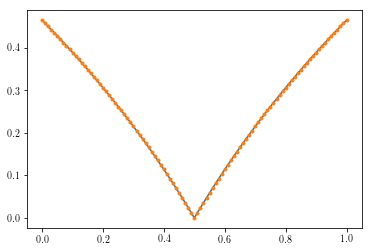

0.46497353003576836


In [4]:
plt.figure()
plt.plot(plist,LN1/np.log(d['8']))
plt.plot(plist,LN_an/np.log(d['8']),'o',markersize=3)
plt.show()
print(LN1[0]/np.log(d['8']))

In [2]:
# 0: id
# 1: 8
# 2: 8
# 3: 10
# 4: \bar 10
def rand_density(n):
    l=np.random.rand(n)
    r1=np.diag(l)/np.sum(l)
    X= (np.random.randn(n,n)+1j*np.random.randn(n,n) )/sqrt(2)
    Q,R= np.linalg.qr(X)
    R = np.diag(np.diag(R)/np.abs(np.diag(R)))
    U = np.dot(Q,R)
    return np.dot(U, np.dot(r1,np.matrix(U).H))


d={'1':1, '8':3, '10':1, '10b':1}

R88_8=np.array([[-1j,0],[0,1j]])
# R88={'1':np.array([[-1]]), '8':R88_8, '10':np.array([[-1]]), '10b':np.array([[-1]])}
F888={}
F888['1']=np.array([[1,0],[0,1]])
F888['8']=np.array([[-1/2,0,0,1/2],\
           [0,1/2,1/2,0],\
           [0,1/2,1/2,0],\
           [1/2,0,0,-1/2]])
F888['10']=np.array([[-1/2,-sqrt(3)/2],[sqrt(3)/2,-1/2]])
F888['10b']=np.array([[-1/2,sqrt(3)/2],[-sqrt(3)/2,-1/2]])

# print(F888)
# p=np.array([[.2,.1],[.1,.8]])
p=np.zeros((2,2))

# np.random.seed(1)
Nrep=100
LN2=np.zeros(Nrep)
LN_an=np.zeros(Nrep)

for i_r in range(0,Nrep):
#     p[0,0]=np.random.randn(1)
#     p[1,1]=1-p[0,0]
# LN=1
# while LN>1e-4: 
    p=rand_density(2)
    p[0,1]=1j*np.imag(p[0,1])
    p[1,0]=1j*np.imag(p[1,0])
    p[1,1]=1/2
    p[0,0]=1/2
    
    M={}
    neg=0
    for c in ['1','8','10','10b']:
        if c=='8':
            M[c]=np.array([[0,0],[0,0]],dtype=np.complex64)
            M_an = [[1j*(p[0,0]+p[1,1])/2,1j*(-p[0,1]+p[1,0])/2],[1j*(-p[0,1]+p[1,0])/2,-1j*(p[0,0]+p[1,1])/2]]
            nu_m=2
        else:
            M[c]= np.array([[0]],dtype=np.complex64)
            if c=='1':
                M_an= -1j*(p[0,0]-p[1,1])
            elif c=='10':
                M_an= 1j*(p[0,0]-p[1,1])/2 + 1j*(p[0,1]+p[1,0])*sqrt(3)/2
            elif c=='10b':
                M_an= 1j*(p[0,0]-p[1,1])/2 - 1j*(p[0,1]+p[1,0])*sqrt(3)/2

            nu_m=1
        for nu in range(0,nu_m):
            for nup in range(0,nu_m):
                for s in range(0,2):
                        for mu in range(0,2):
                            for mup in range(0,2):
                                M[c][nu,nup]+= p[mu,mup]* R88_8[mu,s] * F888[c][s+2*nu,mup+2*nup]

#         print(c)
#         print(np.abs(M[c]-M_an))
#         print(M[c])
#         print('=============')

        if c=='8':
#             n_M= np.linalg.norm(M[c]-M_an)
#             print(c)
#             print(M[c])
#             print(M_an)
#             if n_M> 0.1 :
#                 print(M[c]-M_an)
#                 break
            
            Mh=np.dot(np.matrix(M[c]).H,M[c])
            neg += d[c]/d['8']*np.sum(np.sqrt(np.linalg.eigvalsh(Mh)))
        else:
#             n_M= np.abs(M[c]-M_an)
#             if n_M> 0.1 :
#                 print(M[c]-M_an)
#                 break
            neg += d[c]/d['8']*np.abs(M[c])
    LN2[i_r]= np.log(neg)

    qr= (p[1,0]+p[0,1])/2
    qi= (p[1,0]-p[0,1])/2j
    p0= p[0,0]
    LN_an[i_r]= np.log( np.abs(2*p0-1)/3 + (np.abs(qi+1/2)+np.abs(qi-1/2)) \
                + ( np.abs(2*p0-1+2*sqrt(3)*qr) + np.abs(2*p0-1-2*sqrt(3)*qr) )/6 )
    
#     LN= np.log(neg)
#     if LN2[i_r]< 1e-6:
#         print(p)
#         break
# print(LN,p)
# print(M)

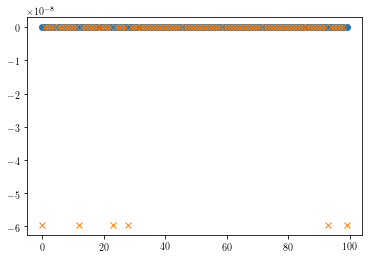

In [3]:
# num_bins=40
# n, bin_edges = np.histogram(LN2, bins=num_bins)
# bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2


# plt.figure()
# plt.plot(bins_center,n,'o')
# plt.show()

plt.figure()
plt.plot(LN_an,'o')
plt.plot(LN2,'x')
plt.show()

In [27]:
rho=rand_density(3)
print(np.linalg.eigvalsh(rho))

[0.19210145 0.3774402  0.43045835]


In [2]:
# 0: id
# 1: 8
# 2: 8
# 3: 10
# 4: \bar 10
def rand_density(n):
    l=np.random.rand(n)
    r1=np.diag(l)/np.sum(l)
    X= (np.random.randn(n,n)+1j*np.random.randn(n,n) )/sqrt(2)
    Q,R= np.linalg.qr(X)
    R = np.diag(np.diag(R)/np.abs(np.diag(R)))
    U = np.dot(Q,R)
    return np.dot(U, np.dot(r1,np.matrix(U).H))


d={'1':1, '8':3, '10':1, '10b':1}

R88_8=np.array([[-1j,0],[0,1j]])
# R88={'1':np.array([[-1]]), '8':R88_8, '10':np.array([[-1]]), '10b':np.array([[-1]])}
F888={}
F888['1']=np.array([[1,0],[0,1]])
F888['8']=np.array([[-1/2,0,0,1/2],\
           [0,1/2,1/2,0],\
           [0,1/2,1/2,0],\
           [1/2,0,0,-1/2]])
F888['10']=np.array([[-1/2,-sqrt(3)/2],[sqrt(3)/2,-1/2]])
F888['10b']=np.array([[-1/2,sqrt(3)/2],[-sqrt(3)/2,-1/2]])

# print(F888)
p=np.array([[0.5,0],[0,.5]])

M={}
neg=0
for c in ['1','8','10','10b']:
    if c=='8':
        M[c]=np.array([[0,0],[0,0]],dtype=np.complex64)
        nu_m=2
    else:
        M[c]= np.array([[0]],dtype=np.complex64)
        nu_m=1
    for nu in range(0,nu_m):
        for nup in range(0,nu_m):
            for s in range(0,2):
                    for mu in range(0,2):
                        for mup in range(0,2):
                            M[c][nu,nup]+= p[mu,mup]* R88_8[mu,s] * F888[c][s+2*nu,mup+2*nup]

    if c=='8':
        Mh=np.dot(np.matrix(M[c]).H,M[c])
        neg += d[c]/d['8']*np.sum(np.sqrt(np.linalg.eigvalsh(Mh)))
    else:
        neg += d[c]/d['8']*np.abs(M[c])
LN= np.log(neg)
print(LN)
print(Mh)


[[0.]]
[[0.25+0.j 0.  +0.j]
 [0.  +0.j 0.25+0.j]]
